<div style="
           border-radius:20px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:1px;
           font-family:cursive
           ">
<h1 style="text-align:center;">Insurance</h1>
<center>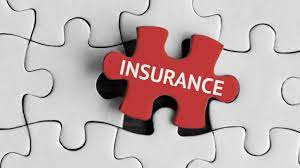</center>

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Adding libraries</h2>
</div>

In [1]:
# FILE:    
# /home/jaime/Documents/CUDA/EXAMPLES/EXAMPLE_01/cuda-neural-network-master/cuda-neural-network/src/INSURANCE/insurance-prediction-with-five-regressor-models.ipynb

In [2]:
# Informative links for xgboost:
# XGBoost Documentation 
# https://xgboost.readthedocs.io/en/stable/
# 
# GPU Support
# https://xgboost.readthedocs.io/en/stable/gpu/index.html
#
# BOOK
# Machine Learning with R
# Brett Lantz
# 

In [3]:
# XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, 
# flexible and portable. It implements machine learning algorithms under the Gradient Boosting 
# framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many 
# data science problems in a fast and accurate way. The same code runs on major distributed 
# environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.
#
# CUDA 10.0, Compute Capability 3.5 required 
# The GPU algorithms in XGBoost require a graphics card with compute capability 3.5 or higher, with 
# CUDA toolkits 10.0 or later. (See this list to look up compute capability of your GPU card.)
# tree_method     Description
# gpu_hist        Equivalent to the XGBoost fast histogram algorithm. Much faster and uses considerably less memory.
# NOTE: May run very slowly on GPUs older than Pascal architecture.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Reading the dataset</h2>
</div>

In [5]:
# df = pd.read_csv('../input/insurance/insurance.csv')
df = pd.read_csv('insurance.csv')

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Data Overview</h2>
</div>

In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.shape

(1338, 7)

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Checking the missing data</h2>
</div>

In [10]:
df.isnull().sum().sort_values(ascending= False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Distribution Plot</h2>
</div>

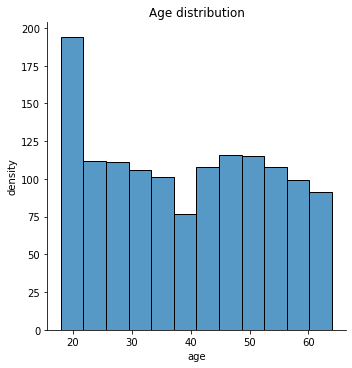

In [11]:
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

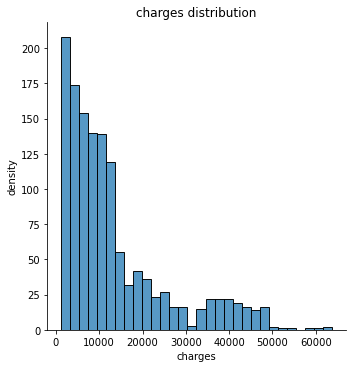

In [12]:
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

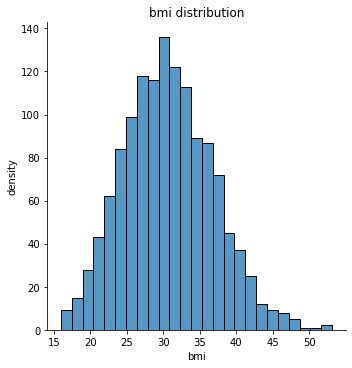

In [13]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Count Plot</h2>
</div>

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

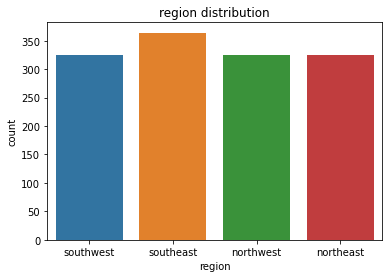

In [15]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('region distribution')
plt.show()

In [16]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

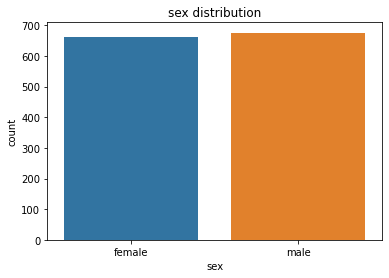

In [17]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
plt.title('sex distribution')
plt.show()

In [18]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

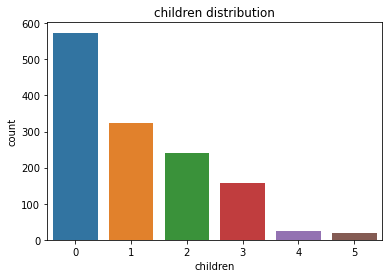

In [19]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['children'])
plt.title('children distribution')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Checking the correlation</h2>
</div>

In [20]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Correlation Plot</h2>
</div>

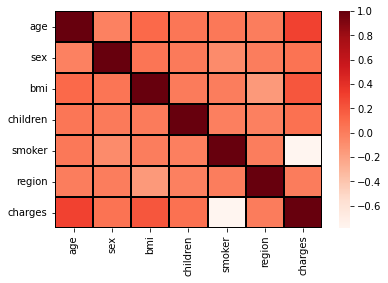

In [21]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pair Plot</h2>
</div>

<Figure size 432x288 with 0 Axes>

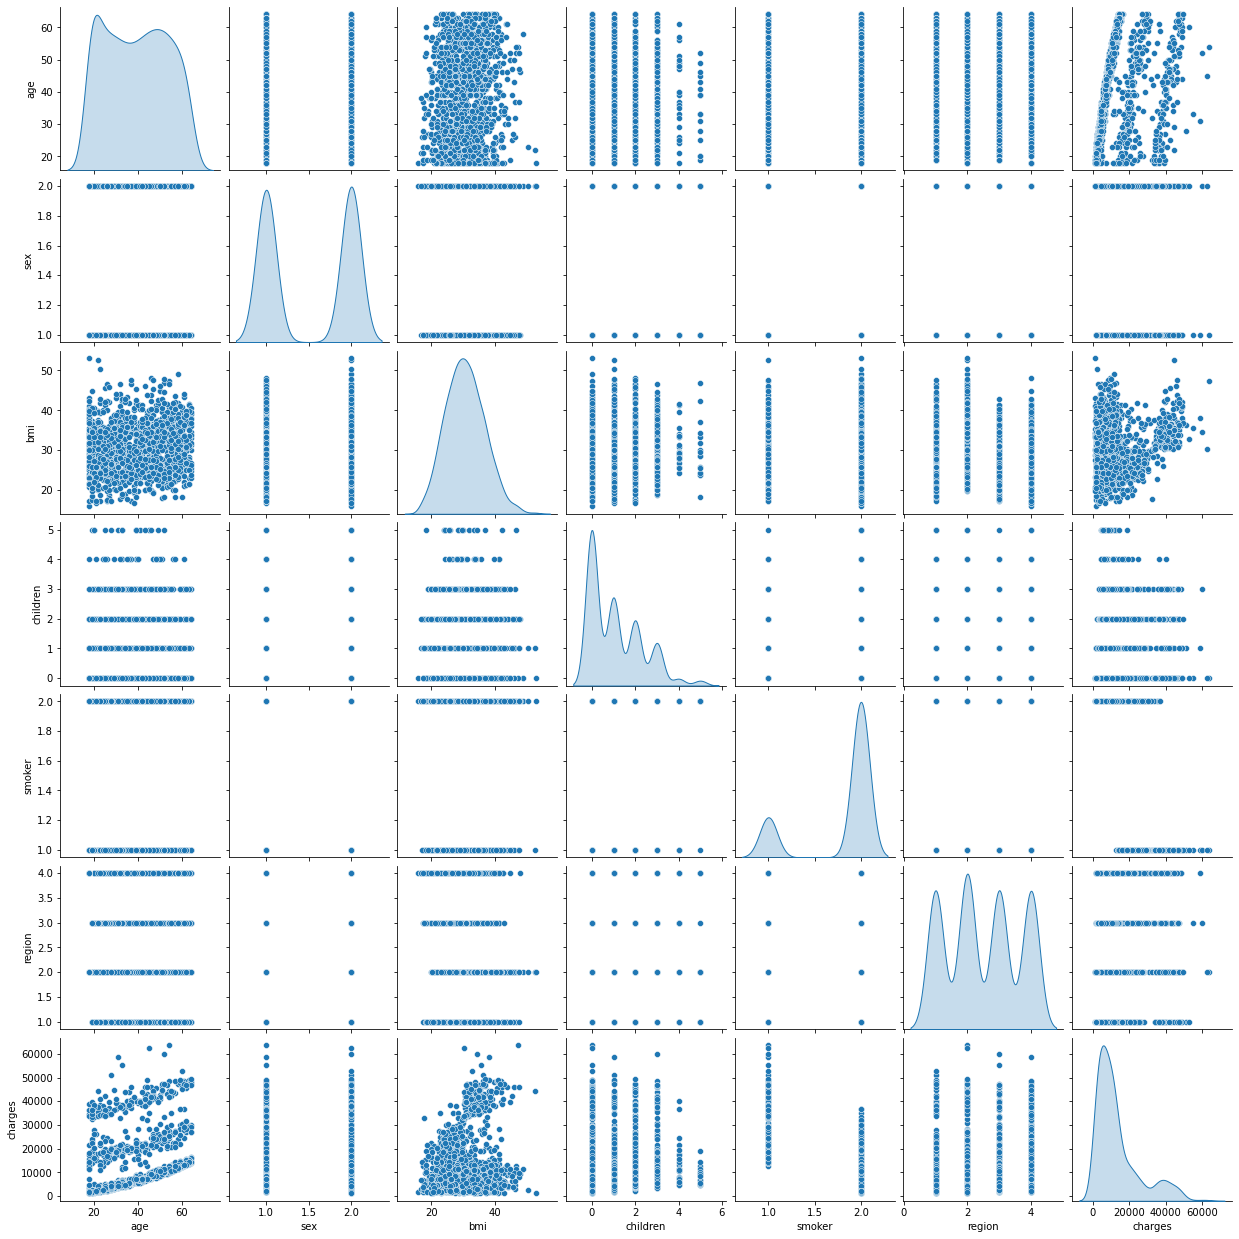

In [22]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Train and Test Split</h2>
</div>

In [23]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Scalling data</h2>
</div>

In [24]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Linear Regression Model</h2>
</div>

In [25]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,3.990250e+03
MSE_li_reg,3.353013e+07
RMSE_li_reg,5.790521e+03


In [27]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88791389 0.85653048 0.84404195 0.87198372 0.84417492]


In [28]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7613126015198816

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Gradient Boosting Regressor Model</h2>
</div>

In [29]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [30]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.526184e+03
MSE_gradient,2.110072e+07
RMSE_gradient,4.593552e+03


In [31]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94591803 0.91451955 0.91680589 0.92427959 0.91717029]


In [32]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.849792542412332

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">XGB Regressor Model</h2>
</div> 

In [33]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

In [34]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,3.103218e+03
MSE_XGB,2.913335e+07
RMSE_XGB,5.397532e+03


In [35]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.93063684 0.88131858 0.90244945 0.89712902 0.88179435]


In [36]:
r2_score(y_test, XGB_model.predict(X_test_scaled))

0.792611508214176

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Decision Tree Regressor Model</h2>
</div> 

In [37]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [38]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.438784e+03
MSE_tree_reg,4.940669e+07
RMSE_tree_reg,7.028989e+03


In [39]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.85613299 0.80716449 0.84992399 0.87395119 0.8511369 ]


In [40]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.648293818061835

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:pink;
           color:Purple;
           font-family:cursive
           ">
<h2 style="text-align:center;">Random Forest Regressor Model</h2>
</div> 

In [41]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [42]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.895959e+03
MSE_forest_reg,2.491965e+07
RMSE_forest_reg,4.991959e+03


In [43]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94118584 0.89991901 0.92270119 0.91469491 0.90294423]


In [44]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8226071055871877